## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# !pip install -U fsds
from fsds.imports import *

pd.set_option('max_columns',0)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

fsds v0.2.22 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [4]:
## Load Data
df = pd.read_csv('kc_house_data.csv',index_col='id')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,nan,0.00,3,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,3,7,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,0.00,0.00,3,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,5,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,3,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [5]:
## Drop Columns I won't use
drop_cols = ['date','view']
df.drop(columns=drop_cols,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     19221 non-null  float64
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  object 
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   17755 non-null  float64
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64

In [7]:
## Check Object Columns for Numbers
df.select_dtypes('O')

,sqft_basement
id,
7129300520,0.0
6414100192,400.0
5631500400,0.0
2487200875,910.0
1954400510,0.0
...,...
263000018,0.0
6600060120,0.0
1523300141,0.0


In [8]:
df['sqft_basement'].value_counts(normalize=True,dropna=False)

0.0      0.59
?        0.02
600.0    0.01
500.0    0.01
700.0    0.01
         ... 
2130.0   0.00
1816.0   0.00
1248.0   0.00
417.0    0.00
1284.0   0.00
Name: sqft_basement, Length: 304, dtype: float64

In [9]:
## Checking Rows that Contain Placeholder
df[df['sqft_basement'].isin(['?'])]#.describe()#.mean()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,
1321400060,257500.00,3,2.25,1715,6819,2.00,0.00,3,7,1715,?,1995,0.00,98003,47.31,-122.33,2238,6819
16000397,189000.00,2,1.00,1200,9850,1.00,0.00,4,7,1200,?,1921,0.00,98002,47.31,-122.21,1060,5095
7203220400,861990.00,5,2.75,3595,5639,2.00,0.00,3,9,3595,?,2014,0.00,98053,47.68,-122.02,3625,5639
1531000030,720000.00,4,2.50,3450,39683,2.00,0.00,3,10,3450,?,2002,0.00,98010,47.34,-122.03,3350,39750
2525310310,272500.00,3,1.75,1540,12600,1.00,0.00,4,7,1160,?,1980,0.00,98038,47.36,-122.03,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226049565,504600.00,5,3.00,2360,5000,1.00,0.00,3,7,1390,?,2008,0.00,98103,47.69,-122.33,2180,5009
1760650900,337500.00,4,2.50,2330,4907,2.00,0.00,3,7,2330,?,2013,nan,98042,47.36,-122.08,2300,3836
6021503707,352500.00,2,2.50,980,1010,3.00,nan,3,8,980,?,2008,0.00,98117,47.68,-122.39,980,1023


In [10]:
## Replace ? with 0.0
df = df.replace({'?':'0.0'})
df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
2130.0        1
1816.0        1
1248.0        1
417.0         1
243.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [12]:
## Convert to numeric
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21597.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,3.41,7.66,1788.60,285.72,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.65,1.17,827.76,439.82,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,1.00,3.00,370.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,4.00,8.00,2210.00,550.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [13]:
## Inspect Number Cols
df.select_dtypes('number')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,
7129300520,221900.00,3,1.00,1180,5650,1.00,nan,3,7,1180,0.00,1955,0.00,98178,47.51,-122.26,1340,5650
6414100192,538000.00,3,2.25,2570,7242,2.00,0.00,3,7,2170,400.00,1951,1991.00,98125,47.72,-122.32,1690,7639
5631500400,180000.00,2,1.00,770,10000,1.00,0.00,3,6,770,0.00,1933,nan,98028,47.74,-122.23,2720,8062
2487200875,604000.00,4,3.00,1960,5000,1.00,0.00,5,7,1050,910.00,1965,0.00,98136,47.52,-122.39,1360,5000
1954400510,510000.00,3,2.00,1680,8080,1.00,0.00,3,8,1680,0.00,1987,0.00,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.00,3,2.50,1530,1131,3.00,0.00,3,8,1530,0.00,2009,0.00,98103,47.70,-122.35,1530,1509
6600060120,400000.00,4,2.50,2310,5813,2.00,0.00,3,8,2310,0.00,2014,0.00,98146,47.51,-122.36,1830,7200
1523300141,402101.00,2,0.75,1020,1350,2.00,0.00,3,7,1020,0.00,2009,0.00,98144,47.59,-122.30,1020,2007


In [91]:
## Save List of Cols to treat as categorical
cat_cols = ['zipcode']

In [14]:
# df.select_dtypes('number')

In [95]:
# with plt.style.context('seaborn-talk'):
# #     fig,ax = plt.subplots(figsize=(20,20))
#     sns.scatterplot(data=df,x='lat',y='long',hue='price',markers='.',palette='Greens')#,ax=ax)

price           0.00
bedrooms        0.00
bathrooms       0.00
sqft_living     0.00
sqft_lot        0.00
floors          0.00
waterfront      0.11
condition       0.00
grade           0.00
sqft_above      0.00
sqft_basement   0.00
yr_built        0.00
yr_renovated    0.18
zipcode         0.00
lat             0.00
long            0.00
sqft_living15   0.00
sqft_lot15      0.00
dtype: float64


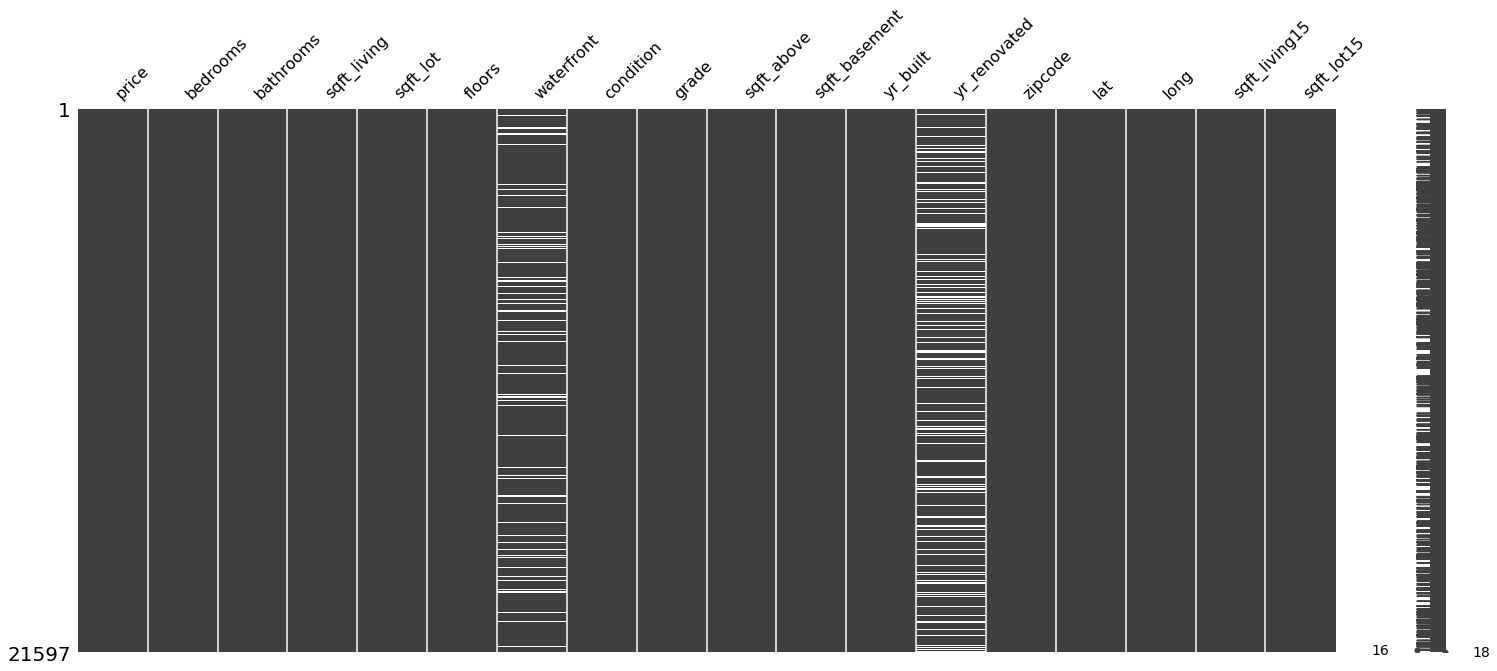

In [22]:
import plotly.express as px
import missingno as ms

null_counts = df.isna().sum()
print(null_counts/len(df))
ms.matrix(df)

# px.scatter(df.fillna(2),x='lat',y='long',color='waterfront',symbol='waterfront')

In [97]:
df['waterfront'].fillna(0,inplace=True)
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [98]:
target='price'
col = 'sqft_basement'

In [99]:
price_fmt = mpl.ticker.StrMethodFormatter("${x:,.2f}")

In [100]:
# from scipy import stats

# def normaltest(x):
#     tests = [['Test','stat','p','p<.05']]
    
#     tests.append( stats.no)

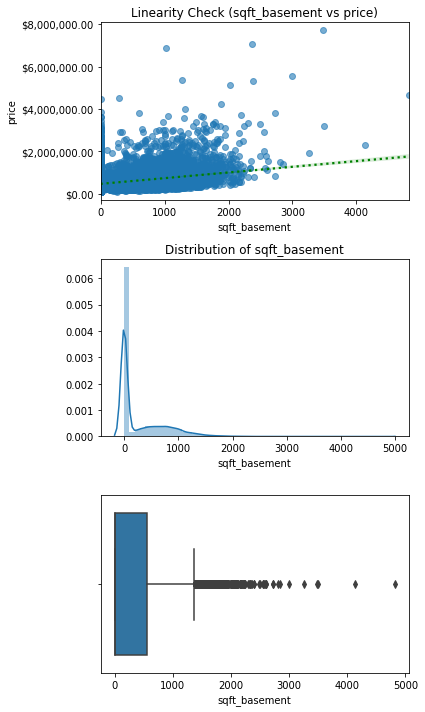

In [101]:
fig,axes = plt.subplots(figsize=(6,10),ncols=1,nrows=3)
axes = axes.flatten()
sns.regplot(col,target,df,ax=axes[0],scatter_kws=dict(alpha=0.6),
            line_kws={'color':'green', 'ls':':'})
axes[0].set_title(f"Linearity Check ({col} vs {target})")
axes[0].yaxis.set_major_formatter(price_fmt)

sns.distplot(df[col],ax=axes[1])
axes[1].set_title(f"Distribution of {col}")


# axes[2].set
sns.boxplot(x=col,data=df,ax=axes[2])
# axes[2].axis('off')

# pd.plotting.table(axes[2], )

plt.tight_layout()

In [102]:
import scipy.stats as stats

In [103]:
def is_outlier_z(data):
    """Returns True for values > 3 zscores away from the mean"""
    zscores = np.abs(stats.zscore(data))
    return zscores > 3

def is_outlier_iqr(data):
    """Returns True for values > that are > 1.5 * IQR cuttoff 
    IQR outlier cutoff = (75% - 25%) * 1.5 """
    res = data.describe()
    iqr = (res['75%'] - res['25%'])*1.5
    return np.abs(data.mean()-data) > (data.mean() + iqr)
    

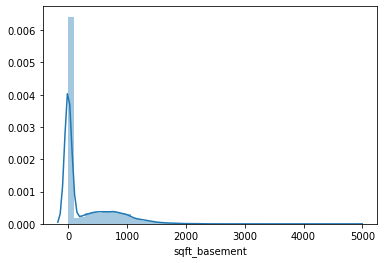

In [104]:
sns.distplot(df['sqft_basement'])

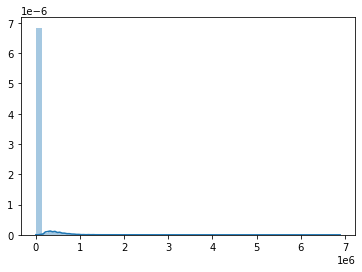

In [105]:
sns.distplot(df[~is_outlier_iqr(df['sqft_basement'])])

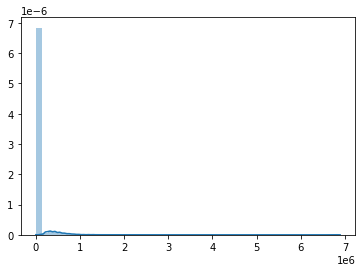

In [106]:
sns.distplot(df[~is_outlier_z(df['sqft_basement'])])

In [107]:
def plot_col_vs_target(df,col,target='price'):
    
    fig,axes = plt.subplots(figsize=(8,13),ncols=1,nrows=3)
    axes = axes.flatten()
    sns.regplot(col,target,df,ax=axes[0],scatter_kws=dict(alpha=0.6),
                line_kws={'color':'green', 'ls':':'})
    axes[0].set_title(f"Linearity Check ({col} vs {target})")
    axes[0].yaxis.set_major_formatter(price_fmt)

    sns.distplot(df[col],ax=axes[1])
    axes[1].set_title(f"Distribution of {col}")

    sns.boxplot(x=col,data=df,ax=axes[2])
    plt.tight_layout()
    return fig,axes

In [108]:

df.select_dtypes('number')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.00,3,1.00,1180,5650,1.00,0.00,3,7,1180,0.00,1955,0.00,98178,47.51,-122.26,1340,5650
1,538000.00,3,2.25,2570,7242,2.00,0.00,3,7,2170,400.00,1951,1991.00,98125,47.72,-122.32,1690,7639
2,180000.00,2,1.00,770,10000,1.00,0.00,3,6,770,0.00,1933,nan,98028,47.74,-122.23,2720,8062
3,604000.00,4,3.00,1960,5000,1.00,0.00,5,7,1050,910.00,1965,0.00,98136,47.52,-122.39,1360,5000
4,510000.00,3,2.00,1680,8080,1.00,0.00,3,8,1680,0.00,1987,0.00,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.00,3,2.50,1530,1131,3.00,0.00,3,8,1530,0.00,2009,0.00,98103,47.70,-122.35,1530,1509
21593,400000.00,4,2.50,2310,5813,2.00,0.00,3,8,2310,0.00,2014,0.00,98146,47.51,-122.36,1830,7200
21594,402101.00,2,0.75,1020,1350,2.00,0.00,3,7,1020,0.00,2009,0.00,98144,47.59,-122.30,1020,2007
21595,400000.00,3,2.50,1600,2388,2.00,0.00,3,8,1600,0.00,2004,0.00,98027,47.53,-122.07,1410,1287


In [109]:
from ipywidgets import interact

@interact
def show_col(col=list(df.columns)):
    plot_col_vs_target(df,col,target='price')

interactive(children=(Dropdown(description='col', options=('price', 'bedrooms', 'bathrooms', 'sqft_living', 's…

## Can I use FacetGrid and df or df_melt?

In [110]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.00,3,1.00,1180,5650,1.00,0.00,3,7,1180,0.00,1955,0.00,98178,47.51,-122.26,1340,5650
1,538000.00,3,2.25,2570,7242,2.00,0.00,3,7,2170,400.00,1951,1991.00,98125,47.72,-122.32,1690,7639
2,180000.00,2,1.00,770,10000,1.00,0.00,3,6,770,0.00,1933,nan,98028,47.74,-122.23,2720,8062
3,604000.00,4,3.00,1960,5000,1.00,0.00,5,7,1050,910.00,1965,0.00,98136,47.52,-122.39,1360,5000
4,510000.00,3,2.00,1680,8080,1.00,0.00,3,8,1680,0.00,1987,0.00,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.00,3,2.50,1530,1131,3.00,0.00,3,8,1530,0.00,2009,0.00,98103,47.70,-122.35,1530,1509
21593,400000.00,4,2.50,2310,5813,2.00,0.00,3,8,2310,0.00,2014,0.00,98146,47.51,-122.36,1830,7200
21594,402101.00,2,0.75,1020,1350,2.00,0.00,3,7,1020,0.00,2009,0.00,98144,47.59,-122.30,1020,2007
21595,400000.00,3,2.50,1600,2388,2.00,0.00,3,8,1600,0.00,2004,0.00,98027,47.53,-122.07,1410,1287


In [111]:
# df_melt = pd.melt(df,id_vars=['price'])
# df_melt
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,21557,21558,21559,21560,21561,21562,21563,21564,21565,21566,21567,21568,21569,21570,21571,21572,21573,21574,21575,21576,21577,21578,21579,21580,21581,21582,21583,21584,21585,21586,21587,21588,21589,21590,21591,21592,21593,21594,21595,21596
price,221900.00,538000.00,180000.00,604000.00,510000.00,1230000.00,257500.00,291850.00,229500.00,323000.00,662500.00,468000.00,310000.00,400000.00,530000.00,650000.00,395000.00,485000.00,189000.00,230000.00,385000.00,2000000.00,285000.00,252700.00,329000.00,233000.00,937000.00,667000.00,438000.00,719000.00,580500.00,280000.00,687500.00,535000.00,322500.00,696000.00,550000.00,640000.00,240000.00,605000.00,...,785000.00,610950.00,399950.00,3570000.00,579000.00,362500.00,645000.00,594866.00,625000.00,490000.00,399950.00,380000.00,270000.00,505000.00,385000.00,414500.00,347500.00,1220000.00,572000.00,475000.00,1090000.00,350000.00,520000.00,679950.00,1580000.00,541800.00,810000.00,1540000.00,467000.00,224000.00,507250.00,429000.00,610685.00,1010000.00,475000.00,360000.00,400000.00,402101.00,400000.00,325000.00
bedrooms,3.00,3.00,2.00,4.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,2.00,3.00,3.00,5.00,4.00,3.00,4.00,2.00,3.00,4.00,3.00,5.00,2.00,3.00,3.00,3.00,3.00,3.00,4.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,4.00,4.00,4.00,...,4.00,3.00,3.00,5.00,4.00,2.00,3.00,3.00,3.00,3.00,2.00,3.00,3.00,2.00,3.00,2.00,3.00,4.00,4.00,3.00,5.00,4.00,2.00,5.00,4.00,4.00,4.00,5.00,3.00,3.00,3.00,3.00,4.00,4.00,3.00,3.00,4.00,2.00,3.00,2.00
bathrooms,1.00,2.25,1.00,3.00,2.00,4.50,2.25,1.50,1.00,2.50,2.50,1.00,1.00,1.75,2.00,3.00,2.00,1.00,1.00,1.00,1.75,2.75,2.50,1.50,2.25,2.00,1.75,1.00,1.75,2.50,2.50,1.50,1.75,1.00,2.75,2.50,1.00,2.00,1.00,2.50,...,3.50,3.00,2.50,4.50,3.25,1.50,3.25,3.00,3.00,2.25,1.00,2.50,2.50,2.50,2.50,1.50,2.50,3.50,2.75,2.25,3.75,2.75,2.25,2.75,3.25,2.50,3.00,3.75,2.50,1.75,2.50,2.00,2.50,3.50,2.50,2.50,2.50,0.75,2.50,0.75
sqft_living,1180.00,2570.00,770.00,1960.00,1680.00,5420.00,1715.00,1060.00,1780.00,1890.00,3560.00,1160.00,1430.00,1370.00,1810.00,2950.00,1890.00,1600.00,1200.00,1250.00,1620.00,3050.00,2270.00,1070.00,2450.00,1710.00,2450.00,1400.00,1520.00,2570.00,2320.00,1190.00,2330.00,1090.00,2060.00,2300.00,1660.00,2360.00,1220.00,2620.00,...,3070.00,1680.00,3087.00,4850.00,1900.00,940.00,1730.00,2780.00,2780.00,1500.00,710.00,1260.00,1870.00,1430.00,1520.00,1210.00,2540.00,4910.00,2770.00,1190.00,4170.00,2500.00,1530.00,3600.00,3410.00,3118.00,3990.00,4470.00,1425.00,1500.00,2270.00,1490.00,2520.00,3510.00,1310.00,1530.00,2310.00,1020.00,1600.00,1020.00
sqft_lot,5650.00,7242.00,10000.00,5000.00,8080.00,101930.00,6819.00,9711.00,7470.00,6560.00,9796.00,6000.00,19901.00,9680.00,4850.00,5000.00,14040.00,4300.00,9850.00,9774.00,4980.00,44867.00,6300.00,9643.00,6500.00,4697.00,2691.00,1581.00,6380.00,7173.00,3980.00,1265.00,5000.00,3000.00,6659.00,3060.00,34848.00,6000.00,8075.00,7553.00,...,4684.00,1570.00,5002.00,10584.00,2631.00,1768.00,1229.00,6000.00,6000.00,1290.00,1157.00,900.00,5000.00,1201.00,1488.00,1278.00,4760.00,9444.00,3852.00,1200.00,8142.00,5995.00,981.00,9437.00,10125.00,7866.00,7838.00,8088.00,1179.00,11968.00,5536.00,1126.00,6023.00,7200.00,1294.00,1131.00,5813.00,1350.00,2388.00,1076.00
floors,1.00,2.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,2.00,1.00,1.00,1.50,1.00,1.50,2.00,2.00,1.50,1.00,1.00,1.00,1.00,2.00,1.00,2.00,1.50,2.00,1.50,1.00,2.00,2.00,3.00,1.50,1.50,1.00,1.50,1.00,2.00,1.00,2.00,...,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,2.00,2.00,1.50,2.00,3.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,3.00,1.00,2.00,3.00,2.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00
waterfront,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,

In [112]:
# g = sns.FacetGrid(df_melt,col='variable',col_wrap=4)
# g.map(sns.regplot,'variable','price')

In [113]:
# sns.lmplot()

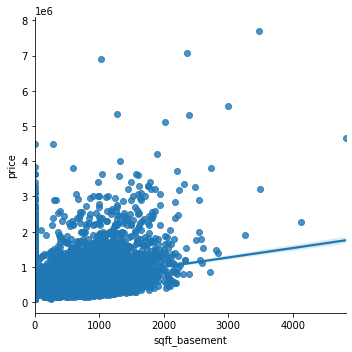

In [114]:
sns.lmplot('sqft_basement','price',df)

# Feature Engineering

In [115]:
## was_renovated 
df['was_renovated'] = (df['yr_renovated'] > 0).astype(int)
df.drop('yr_renovated',axis=1,inplace=True)
df['was_renovated'].value_counts()

0    20853
1      744
Name: was_renovated, dtype: int64

In [116]:
df['sqft_basement'].value_counts()#normalize=True)

0.00       13280
600.00       217
500.00       209
700.00       208
800.00       201
           ...  
915.00         1
295.00         1
1281.00        1
2130.00        1
906.00         1
Name: sqft_basement, Length: 303, dtype: int64

In [117]:
## has_basement
df['has_basement'] = (df['sqft_basement'] >0).astype(int)
df.drop('sqft_basement',axis=1,inplace=True)
df['has_basement'].value_counts(dropna=False)

0    13280
1     8317
Name: has_basement, dtype: int64

In [118]:
## Check Nulls
df.isna().sum()/len(df)

price           0.00
bedrooms        0.00
bathrooms       0.00
sqft_living     0.00
sqft_lot        0.00
floors          0.00
waterfront      0.00
condition       0.00
grade           0.00
sqft_above      0.00
yr_built        0.00
zipcode         0.00
lat             0.00
long            0.00
sqft_living15   0.00
sqft_lot15      0.00
was_renovated   0.00
has_basement    0.00
dtype: float64

# EDA

In [119]:
# pd.plotting.scatter_matrix(df,figsize=(20,20));

# Quick Baseline Model

In [120]:
cat_cols=['zipcode']
cat_features = [col.replace(col,f"C({col})") for col in cat_cols]
cat_features

['C(zipcode)']

In [121]:
# ixn_cols = [('sqft_living','waterfront')]

# [f""

### def `make_ols_f`, `diagnose_model`

In [122]:
import statsmodels.formula.api as smf
import statsmodels.api as sms
def make_ols_f(df, target='price',col_list=[], cat_cols = [],
               exclude_cols=[], ixn_cols = [], show_summary=True):
    """Creates a statsmodels formula-OLS model using specified columns.
    
    Args:
        df (DataFrame): 
        target (str): column name of target variable. 
        col_list ( )
    """
    
    ## Use all columns if col_list==None:
    if len(col_list) == 0:# col_list is None:
        col_list = list(df.drop(target,axis=1).columns)
        
    ## Remove exclude cols from col_list
    [col_list.remove(ecol) for ecol in exclude_cols if ecol in col_list]

    ## make Category Columns  
    cat_features = [col.replace(col,f"C({col})") for col in cat_cols]
    
    
    
    ## COMBINE ALL FEATURES INTO 1 LIST
    feature_list = [*col_list,*cat_features]
    
    ## Create Formula Portion for Features 
    features_formula = ' + '.join(feature_list)
    

    ## Creates Formula Portion for Interactions
    


    ## Make Model and Formula
    formula = target+' ~ '+features_formula #target~predictors
    model = smf.ols(formula=formula, data=df).fit()
    
    if show_summary:
        display(model.summary())

    return model


## diagnostic function
def diagnose_model(model):
    
    resids = model.resid
    
    fig,ax = plt.subplots(ncols=2,figsize=(10,5))
    sms.qqplot(resids, stats.distributions.norm,
              fit=True, line='45',ax=ax[0])
    xs = np.linspace(0,1,len(resids))
    ax[1].scatter(x=xs,y=resids)
    ax[1].axhline(0)
    plt.show()
    
    return fig,ax 

In [123]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
condition          int64
grade              int64
sqft_above         int64
yr_built           int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
was_renovated      int64
has_basement       int64
dtype: object

In [124]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,KFold
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler


### Defining Columns

In [125]:
## Save Target col
target = 'price'

In [126]:
## Get Category columns
# df['zipcode'] = df['zipcode'].astype(str)
cat_cols = df.drop(target,axis=1).select_dtypes('O').columns.to_list()
cat_cols

[]

In [127]:
## Define Equation Column Groups
num_cols = df.drop(target,axis=1).select_dtypes('number').columns.to_list()
num_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'grade',
 'sqft_above',
 'yr_built',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'was_renovated',
 'has_basement']

### Making df_scale

In [128]:
## Scaling Num Cols
df_scale = df.copy()
scaler = StandardScaler()
df_scale[num_cols] = scaler.fit_transform(df_scale[num_cols])
df_scale.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,has_basement
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,540296.57,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00
std,367368.14,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,78000.00,-2.56,-2.10,-1.86,-0.35,-0.92,-0.08,-3.70,-3.97,-1.71,-2.42,-1.44,-2.92,-2.17,-2.32,-0.44,-0.19,-0.79
25%,322000.00,-0.40,-0.48,-0.71,-0.24,-0.92,-0.08,-0.63,-0.56,-0.72,-0.68,-0.84,-0.64,-0.81,-0.72,-0.28,-0.19,-0.79
50%,450000.00,-0.40,0.17,-0.19,-0.18,0.01,-0.08,-0.63,-0.56,-0.28,0.14,-0.24,0.08,-0.12,-0.21,-0.19,-0.19,-0.79
75%,645000.00,0.68,0.50,0.51,-0.11,0.94,-0.08,0.91,0.29,0.51,0.89,0.75,0.85,0.63,0.54,-0.10,-0.19,1.26
max,7700000.00,31.98,7.65,12.48,39.51,3.72,12.12,2.44,4.55,9.21,1.50,2.26,1.57,6.39,6.16,31.47,5.29,1.26


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     2320.
Date:                Sat, 18 Jul 2020   Prob (F-statistic):               0.00
Time:                        21:37:12   Log-Likelihood:            -2.9463e+05
No. Observations:               21597   AIC:                         5.893e+05
Df Residuals:                   21575   BIC:                         5.895e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            5.6e+05   6911.631     81.016      0.000    5.46e+05    5.73e+05
C(floors)[T.0.010939267476541456] -2.205e+04   8621.419     -2.558      0.011    -3.9e+04   -5156.377
C(floors)[T.0.9374308741074004]   -4.707e+04   1.39e+04     -3.380      0.001   -7.44e+04   -1.98e+04
C(floors)[T.1.8639224807382593]    7.825e+04   2.45e+04      3.192      0.001    3.02e+04    1.26e+05
C(floors)[T.2.7904140873691183]   -1.317e+04   2.79e+04     -0.473      0.637   -6.78e+04    4.15e+04
C(floors)[T.3.716905693999977]     1.014e+05   4.36e+04      2.326      0.020     1.6e+04    1.87e+05
bedrooms                          -3.627e+04   1785.649    -20.311      0.000   -3.98e+04   -3.28e+04
bathrooms                          3.534e+04   2562.525     13.790      0.000    3.03e+04    4.04e+04
sqft_living                        1.524e+05   5571.912     27.346      0.000    1.41e+05    1.63e+05
sqft_lot                           6797.8523   2008.353      3.385      0.001    2861.332    1.07e+04
floors                             1.831e+04   7452.724      2.457      0.014    3701.542    3.29e+04
waterfront                         6.381e+04   1407.335     45.344      0.000    6.11e+04    6.66e+04
condition                          1.715e+04   1547.246     11.084      0.000    1.41e+04    2.02e+04
grade                              1.178e+05   2565.258     45.918      0.000    1.13e+05    1.23e+05
sqft_above                         1.292e+04   5575.915      2.318      0.020    1995.295    2.39e+04
yr_built                          -8.162e+04   2302.283    -35.451      0.000   -8.61e+04   -7.71e+04
zipcode                           -2.691e+04   1780.870    -15.108      0.000   -3.04e+04   -2.34e+04
lat                                7.897e+04   1509.379     52.316      0.000     7.6e+04    8.19e+04
long                              -3.123e+04   1892.353    -16.503      0.000   -3.49e+04   -2.75e+04
sqft_living15                      2.624e+04   2370.236     11.069      0.000    2.16e+04    3.09e+04
sqft_lot15                        -1.104e+04   2025.264     -5.453      0.000    -1.5e+04   -7074.606
was_renovated                      9526.3015   1467.919      6.490      0.000    6649.071    1.24e+04
has_basement                      -2996.9343   2506.528     -1.196      0.232   -7909.915    1916.046
==============================================================================
Omnibus:                    17955.420   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1620151.832
Skew:                           3.472   Prob(JB):                         0.00
Kurtosis:                      44.859   Cond. No.                     2.75e+15
====================================

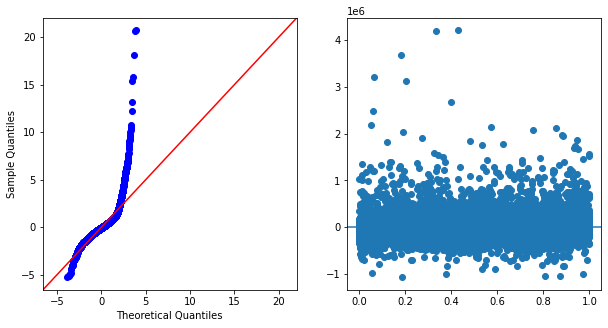

(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x14138a080>,
       dtype=object))

In [129]:
model = make_ols_f(df_scale,cat_cols=['floors'])#,
#                    exclude_cols=['zipcode'])#,cat_cols=['grade','condition'])
diagnose_model(model)

### def `get_model_coeffs`

In [130]:
def highlight_sig(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_sig = s > .05
    return ['color: red' if v else '' for v in is_sig]

def get_model_coeffs(model,cmap = 'RdYlGn'):
    
    coeffs = pd.DataFrame({'coeffs':model.params,
                           'abs(coeffs)':np.abs(model.params),
                          'pvalue':np.round(model.pvalues,4)})
    coeffs = coeffs.sort_values('abs(coeffs)',ascending=False)
    coeffs.drop('abs(coeffs)',axis=1,inplace=True)
    


    display(coeffs.style.format('${:,.2f}',subset=['coeffs']).\
            background_gradient(subset=['coeffs'],cmap=cmap).\
           apply(highlight_sig,subset=['pvalue']))#.\
#             set_caption(cmap))
    return coeffs

In [131]:
# get_model_coeffs(model);

In [132]:
# coeffs = pd.DataFrame({'coeffs':model.params,
#                        'abs(coeffs)':np.abs(model.params)})
# # coeffs.sort_values(0)
# coeffs = coeffs.sort_values('abs(coeffs)',ascending=False)

# # for cmap in [
# #             'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
# #             'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']:
# cmap = 'RdYlGn'
# display(coeffs.style.format('${:,.2f}').\
#         background_gradient(subset=['coeffs'],cmap=cmap).\
#         set_caption(cmap))

### Putting it all Together

In [133]:
def evaluate_model(model):
    display(model.summary().tables[0])
    get_model_coeffs(model);
    diagnose_model(model)

Dep. Variable:,price,R-squared:,0.693
Model:,OLS,Adj. R-squared:,0.693
Method:,Least Squares,F-statistic:,2320.
Date:,"Sat, 18 Jul 2020",Prob (F-statistic):,0.00
Time:,21:37:13,Log-Likelihood:,-2.9463e+05
No. Observations:,21597,AIC:,5.893e+05
Df Residuals:,21575,BIC:,5.895e+05
Df Model:,21,,
Covariance Type:,nonrobust,,


,coeffs,pvalue
Intercept,"$559,951.98",0.000000
sqft_living,"$152,369.02",0.000000
grade,"$117,790.68",0.000000
C(floors)[T.3.716905693999977],"$101,447.20",0.020000
yr_built,"$-81,617.16",0.000000
lat,"$78,965.24",0.000000
C(floors)[T.1.8639224807382593],"$78,246.02",0.001400
waterfront,"$63,814.60",0.000000
C(floors)[T.0.9374308741074004],"$-47,071.60",0.000700
bedrooms,"$-36,269.17",0.000000


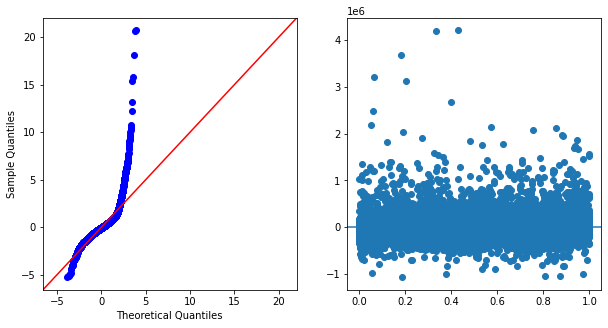

(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x136aa5748>,
       dtype=object))

In [134]:
model = make_ols_f(df_scale,cat_cols=['floors'],show_summary=False)#,
display(model.summary().tables[0])
get_model_coeffs(model);
diagnose_model(model)

In [135]:
# np.log(df)

### making `df_log`

In [136]:
num_cols.remove('waterfront')
# num_cols

In [137]:
df[num_cols].isna().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
grade            0
sqft_above       0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
was_renovated    0
has_basement     0
dtype: int64

In [157]:
## Logging the Data
df_log = df.copy()

for col in num_cols:
    df_log[col] = np.log(df_log[col], where= df_log[col]!=0.)

df_log = df_log.drop(columns=['lat','long'])
display(df_log.describe())

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning:

invalid value encountered in log



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,was_renovated,has_basement
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,540296.57,1.18,0.68,7.55,8.99,0.34,0.01,1.21,2.02,7.40,7.59,11.49,7.54,8.96,8.65,5.37
std,367368.14,0.28,0.39,0.42,0.90,0.35,0.08,0.18,0.15,0.43,0.01,0.00,0.33,0.81,1.82,4.46
min,78000.00,0.00,-0.69,5.91,6.25,0.00,0.00,0.00,1.10,5.91,7.55,11.49,5.99,6.48,0.00,0.00
25%,322000.00,1.10,0.56,7.27,8.53,0.00,0.00,1.10,1.95,7.08,7.58,11.49,7.31,8.54,8.52,0.00
50%,450000.00,1.10,0.81,7.55,8.94,0.41,0.00,1.10,1.95,7.35,7.59,11.49,7.52,8.94,8.92,8.41
75%,645000.00,1.39,0.92,7.84,9.28,0.69,0.00,1.39,2.08,7.70,7.60,11.49,7.77,9.22,9.21,9.01
max,7700000.00,3.50,2.08,9.51,14.32,1.25,1.00,1.61,2.56,9.15,7.61,11.49,8.73,13.68,13.68,13.66


In [174]:
## Remove outs
df_remouts = df[~is_outlier_z(df['price'])].copy()
for col in df.columns:
    df_remouts = df_remouts[~is_outlier_z(df_remouts[col])]
df_remouts.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,has_basement
count,18582.00,18582.00,18582.00,18582.00,18582.00,18582.00,18582.00,18582.00,18582.00,18582.00,18582.00,18582.00,18582.00,18582.00,18582.00,18582.00,18582.00,18582.00
mean,469297.29,3.31,2.02,1915.92,9290.14,1.47,0.00,3.43,7.49,1649.72,1970.92,98079.73,47.56,-122.23,1884.25,8530.35,0.00,0.38
std,208902.73,0.85,0.67,695.66,9822.13,0.54,0.00,0.65,0.96,649.80,28.99,53.88,0.14,0.13,562.87,7058.70,0.00,0.49
min,82000.00,1.00,0.50,370.00,520.00,1.00,0.00,2.00,5.00,370.00,1900.00,98001.00,47.18,-122.50,460.00,651.00,0.00,0.00
25%,310000.00,3.00,1.50,1390.00,5000.00,1.00,0.00,3.00,7.00,1160.00,1952.00,98033.00,47.46,-122.33,1460.00,5000.00,0.00,0.00
50%,429150.00,3.00,2.00,1820.00,7306.00,1.00,0.00,3.00,7.00,1490.00,1974.00,98072.00,47.57,-122.25,1780.00,7392.50,0.00,0.00
75%,588000.00,4.00,2.50,2370.00,9759.75,2.00,0.00,4.00,8.00,2028.25,1996.00,98118.00,47.68,-122.14,2240.00,9500.00,0.00,1.00
max,1280000.00,6.00,4.00,4320.00,130680.00,3.00,0.00,5.00,10.00,3730.00,2015.00,98199.00,47.78,-121.80,3640.00,54520.00,0.00,1.00


In [183]:
compare_df = pd.DataFrame({'orig':df.describe().loc['mean'],
 'cleaned':df_remouts.describe().loc['mean']})

compare_df['delta'] = compare_df['cleaned'] - compare_df['orig']
compare_df

,orig,cleaned,delta
price,540296.57,469297.29,-70999.28
bedrooms,3.37,3.31,-0.06
bathrooms,2.12,2.02,-0.10
sqft_living,2080.32,1915.92,-164.40
sqft_lot,15099.41,9290.14,-5809.27
floors,1.49,1.47,-0.03
waterfront,0.01,0.00,-0.01
condition,3.41,3.43,0.02
grade,7.66,7.49,-0.17
sqft_above,1788.60,1649.72,-138.87


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:1362: RuntimeWarning:

invalid value encountered in true_divide

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning:

invalid value encountered in less_equal



Dep. Variable:,price,R-squared:,0.821
Model:,OLS,Adj. R-squared:,0.821
Method:,Least Squares,F-statistic:,1025.
Date:,"Sat, 18 Jul 2020",Prob (F-statistic):,0.00
Time:,21:46:19,Log-Likelihood:,-2.3798e+05
No. Observations:,18582,AIC:,4.761e+05
Df Residuals:,18498,BIC:,4.768e+05
Df Model:,83,,
Covariance Type:,nonrobust,,


,coeffs,pvalue
C(zipcode)[T.98039],"$632,197.85",0.000000
C(zipcode)[T.98004],"$502,657.51",0.000000
C(zipcode)[T.98112],"$444,962.20",0.000000
C(zipcode)[T.98040],"$423,320.14",0.000000
C(zipcode)[T.98109],"$417,049.40",0.000000
C(zipcode)[T.98119],"$410,992.33",0.000000
C(zipcode)[T.98102],"$406,049.63",0.000000
C(zipcode)[T.98105],"$376,185.82",0.000000
C(zipcode)[T.98199],"$359,013.85",0.000000
C(zipcode)[T.98122],"$312,223.39",0.000000


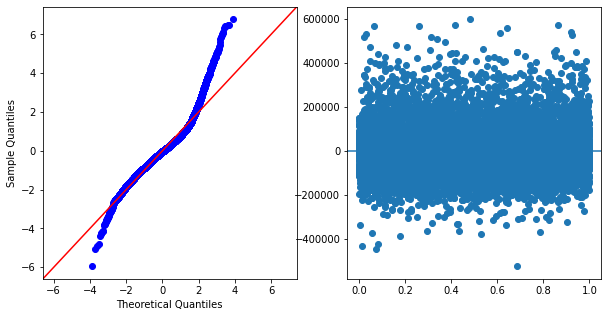

In [173]:
model = make_ols_f(df_remouts,cat_cols=['zipcode'],show_summary=False)#,
evaluate_model(model)

Dep. Variable:,price,R-squared:,0.800
Model:,OLS,Adj. R-squared:,0.799
Method:,Least Squares,F-statistic:,964.5
Date:,"Sat, 18 Jul 2020",Prob (F-statistic):,0.00
Time:,21:43:46,Log-Likelihood:,-2.9003e+05
No. Observations:,21597,AIC:,5.802e+05
Df Residuals:,21507,BIC:,5.810e+05
Df Model:,89,,
Covariance Type:,nonrobust,,


,coeffs,pvalue
C(zipcode)[T.-0.7279108686938158],"$1,194,568.31",0.000000
C(zipcode)[T.-1.381971807199419],"$716,054.50",0.000000
Intercept,"$503,781.08",0.000000
C(zipcode)[T.-0.7092234133079414],"$418,286.92",0.000000
C(zipcode)[T.0.6362733744750134],"$390,872.37",0.000000
C(zipcode)[T.0.44939882061626973],"$301,211.27",0.000000
C(zipcode)[T.0.5802110083173904],"$290,253.17",0.000000
C(zipcode)[T.-0.840035601009062],"$271,729.28",0.000000
C(zipcode)[T.0.767085562176134],"$265,293.30",0.000000
C(zipcode)[T.0.5054611867738928],"$264,442.99",0.000000


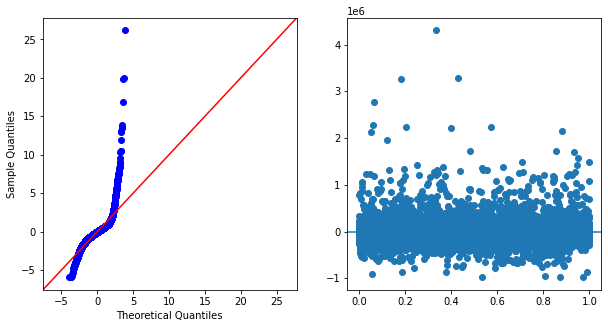

In [167]:
model = make_ols_f(df_scale,cat_cols=['zipcode','floors'],show_summary=False)#,
evaluate_model(model)

Dep. Variable:,price,R-squared:,0.693
Model:,OLS,Adj. R-squared:,0.693
Method:,Least Squares,F-statistic:,2320.
Date:,"Sat, 18 Jul 2020",Prob (F-statistic):,0.00
Time:,21:41:29,Log-Likelihood:,-2.9463e+05
No. Observations:,21597,AIC:,5.893e+05
Df Residuals:,21575,BIC:,5.895e+05
Df Model:,21,,
Covariance Type:,nonrobust,,


,coeffs,pvalue
Intercept,"$559,951.98",0.000000
sqft_living,"$152,369.02",0.000000
grade,"$117,790.68",0.000000
C(floors)[T.3.716905693999977],"$101,447.20",0.020000
yr_built,"$-81,617.16",0.000000
lat,"$78,965.24",0.000000
C(floors)[T.1.8639224807382593],"$78,246.02",0.001400
waterfront,"$63,814.60",0.000000
C(floors)[T.0.9374308741074004],"$-47,071.60",0.000700
bedrooms,"$-36,269.17",0.000000


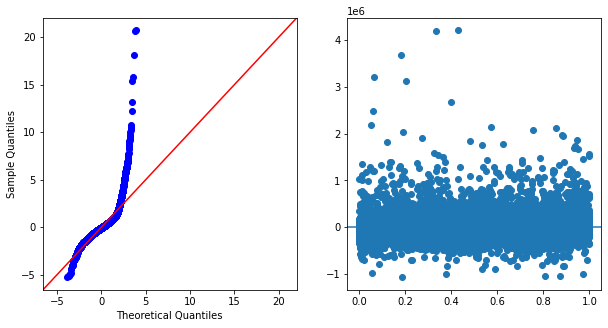

In [156]:
model = make_ols_f(df_scale,
                   cat_cols=['floors'],show_summary=False)#,
evaluate_model(model)

In [63]:
# model.pvalues[model.pvalues > .05]

### Compare Data 

In [149]:
df_log.drop(columns=['lat','long'],axis=1,inplace=True)

KeyError: "['lat' 'long'] not found in axis"

In [66]:
df_log.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
yr_built         0
zipcode          0
sqft_living15    0
sqft_lot15       0
was_renovated    0
has_basement     0
dtype: int64

In [67]:
make_ols_f(df_log)#,show_summary=False)

LinAlgError: SVD did not converge

In [ ]:
data_dict = {'scaled':df_scale,
            'raw':df,
            'logged':df_log}

In [68]:
model_dict = {}
for name,df_ in data_dict.items():
    try:
        model_dict[name] = make_ols_f(df_,show_summary=False)
    except Exception as e:
        print(name,'\n',e)

NameError: name 'data_dict' is not defined

In [ ]:
model_dict.keys()

# SKLEARN

- LinearRegression in sklearn
https://medium.com/@oluwabukunmige/implementing-linear-regression-with-sci-kit-learn-b6f87edc3150

In [ ]:
stop

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [ ]:
## Instantiate a scaler
rob_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

y_col = 'price'

## Imputers
impute_qs = SimpleImputer(missing_values='?',strategy='most_frequent',add_indicator=True)
imput_nums = SimpleImputer(strategy='median',add_indicator=True)

df = pd.read_csv('kc_house_data.csv')
df.isna().sum()[df.isna().sum()>0]

In [ ]:
df.dtypes

In [ ]:
df['sqft_basement'].value_counts()

In [ ]:
num_transformer = Pipeline([
    ('impute_qs',,
    ('impute_qs',SimpleImputer(missing_values='?',strategy='most_frequent'),
    (''))])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
num_cols = df.drop(y_col,axis=1).select_dtypes('number').columns
cat_clls = 

In [ ]:
pipe = Pipeline([
    ('scaler',rob_scaler),
    ('scaler',rob_scaler),
    
])

# EDA - Mapping

In [ ]:
stop

In [ ]:
import plotly.io as pio
pio.templates

In [ ]:
from geopy.geocoders import Nominatim
geocoder = Nominatim(user_agent='my_app')
loc_name, (lat,lon) = geocoder.geocode('king county washington')
print(loc_name)
lat,lon

In [ ]:
import plotly.express as px
pfig = px.scatter_geo(df,lat='lat',lon='long',color='price',#scope='usa',
                      template='plotly_dark',center={'lat':lat,'lon':lon})

In [ ]:
pfig.update_layout(dict(geo={"projection":{'scale':300}}))
pfig.show(config={'scrollZoom':False})
# pfig

In [ ]:
#https://python-visualization.github.io/folium/quickstart.html
import folium
kc_map = folium.Map(location=(lat,lon),zoom_start=10)#,tiles='Stamen Toner')
# for 
kc_map

- https://stackoverflow.com/questions/49984575/is-there-a-limit-to-plotting-markers-with-folium
```python
from folium.plugins import FastMarkerCluster
my_map.add_child(FastMarkerCluster(samples[['latitude', longitude']].values.tolist()))
```

In [ ]:
def make_marker(row):

    return folium.Marker((row['lat'],row['long']),popup=row['price'])#.add_to(kc_map

markers = df.apply(add_marker,axis=1)


In [ ]:
def icon_create_function(x):
    """for FastMarkerCluster"""


In [ ]:
from folium.plugins import FastMarkerCluster
kc_map.add_child(FastMarkerCluster(df[['lat','long']]))

# EDA